# ObsID : 0945070133, SRCNUM : 10, Instru : EPN
**Simbad :** Star *2MASS J03332989-2714334* (https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4013058032&Name=2MASS%20J03332989-2714334&submit=submit).

## ESASky
https://sky.esa.int/esasky/?target=53.37579166666667%20-27.242833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033329.9-271434
- IAU name : 4XMM J033329.9-271433
- RA : 03h 33m 29.959s
- DEC : -27° 14' 34.10"

``GAIA``
- Designation : Gaia DR3 5060545834987968640
- RA : 03h 33m 29.937s
- DEC : -27° 14' 33.44"
- Parallax : 1.9836 mas
- G : 17.5984

``2MASS``
- Name : 03332989-2714334
- RA : 03h 33m 29.898s
- DEC : -27° 14' 33.48"

In [11]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [12]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected reduce Chi-squared value of a perfect fit is **≈ 1** with: ``reduce Chi-squared = Chi-squared/(n_bins-n_parameters)``.

## Load files

In [13]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945070133_SRCNUM10_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.166e-03 +/- 1.555e-03 (54.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-5
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7831 sec
 Using fit statistic: chi
 Using Background File                ObsID0945070133_SRCNUM10_EPN_background_spectrum.fits
  Background Exposure Time: 7832 sec
 Using Response (RMF) File            ObsID0945070133_SRCNUM10_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945070133_SRCNUM10_EPN.arf


Fit statistic  : Chi-Squared              1.571831e+12     using 5 bins.

Test statistic : Chi-Squared              1.571831e+12     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.


In [14]:
print(f"Number of counts = {9.166e-03*7831} cts")

Number of counts = 71.778946 cts


The number of counts is lower than 100 cts, indicating that the C statistic should be a better choice than Chi-squared as a fit statistic.

## Plot spectrum

In [15]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.000001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

***Warning: Fit is not current.
     1 channels (1) ignored in spectrum #     1
     1 channels (5) ignored in spectrum #     1

Fit statistic  : Chi-Squared              6.939150e+10     using 3 bins.

Test statistic : Chi-Squared              6.939150e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.



GammQ: A <=  0


(-0.5, 860.5, 660.5, -0.5)

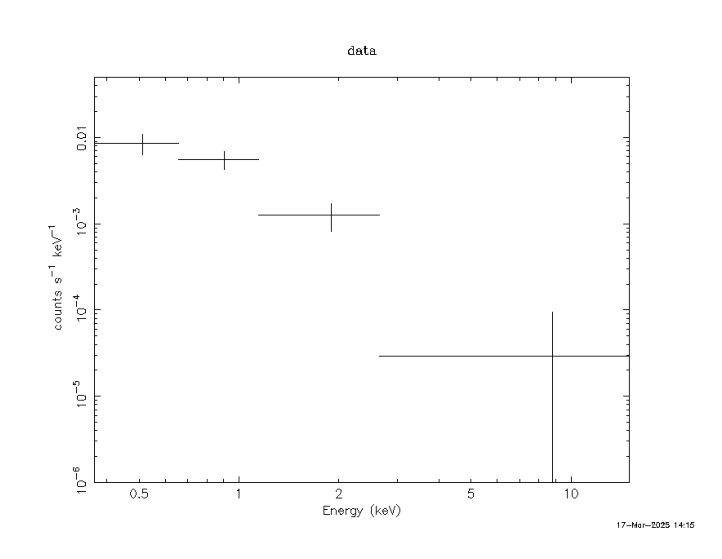

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
There are 3 parameters in the ``tbabs*bbody`` model. Here, Chi-squared = 25.8567 using 3 bins. The reduce Chi-squared cannot be calculated meaning the model has no statistical significance.

In [16]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.939150e+10     using 3 bins.

Test statistic : Chi-Squared              6.939150e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
30.683       0.175208     -1      0.251170       3.39341   7.36527e-06
29.528       121773        0      0.115295       3.39871   7.25115e-06
29.1401      136463        0     0.0452718       3.43871   6.92222e-06
28.955       159695        0

GammQ: A <=  0
GammQ: A <=  0


     1        2        3  
 5.3945E-12| -0.0000  -0.0000   1.0000  
 1.0598E+00|  0.9991  -0.0435   0.0000  
 2.3257E+05|  0.0435   0.9991   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   4.407e+02   1.010e+04   8.028e-02
   1.010e+04   2.321e+05   1.844e+00
   8.028e-02   1.844e+00   1.465e-05
------------------------------------

Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    4.30111E-16  +/-  20.9922      
   2    2   bbody      kT         keV      3.08585      +/-  481.800      
   3    2   bbody      norm                8.60046E-06  +/-  3.82816E-03  
________________________________________________________________________


Fit statistic  : Chi-Squared                 25.8567     using 3 bins.

Test statistic : Chi-Squared                 25.8567     using 3 bins.
 Cannot calculate null hypothesis probability.
 M

(-0.5, 857.5, 661.5, -0.5)

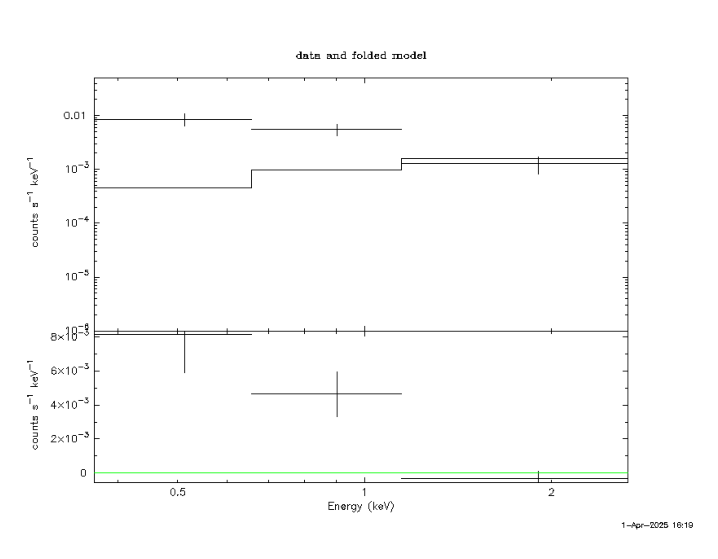

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
There are 3 parameters in the ``tbabs*bremss`` model. Here, Chi-squared = 2e-09 using 3 bins. The reduce Chi-squared cannot be calculated meaning the model has no statistical significance.

In [13]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.307206e+10     using 3 bins.

Test statistic : Chi-Squared              3.307206e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
27.639       0.782616     -3      0.293948       3.34107   5.47695e-06
17.5144      309591       -1     0.0741581       1.60559   6.59193e-06
1.53501      447076       -2    0.00661419       1.30488   1.25361e-05
0.155225     167307       -

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 860.5, 657.5, -0.5)

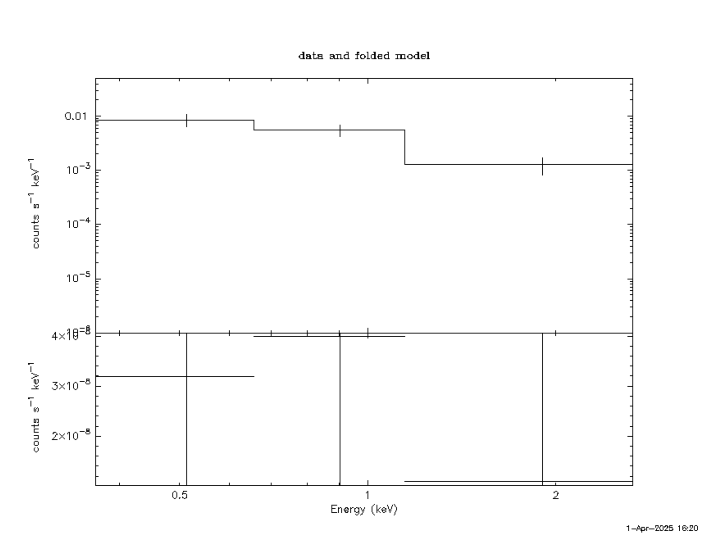

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
There are 4 parameters in the ``tbabs*apec`` model. Here, Chi-squared = 5.7898 using 3 bins. The reduce Chi-squared cannot be calculated meaning the model has no statistical significance.

In [14]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")

GammQ: A <=  0
GammQ: A <=  0



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.735343e+09     using 3 bins.

Test statistic : Chi-Squared              8.735343e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
15.6729      3.10806       0      0.944841      0.647217   5.13444e-05
12.4749      32832.7      -1      0.763938   

(-0.5, 854.5, 656.5, -0.5)

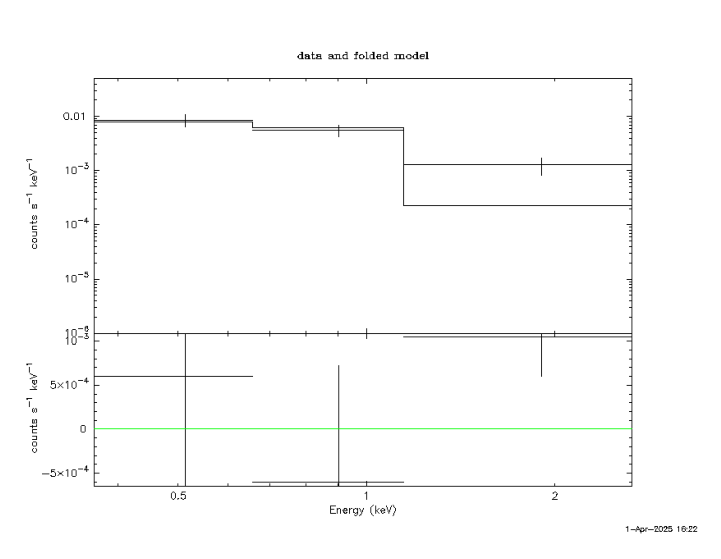

In [15]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
There are 3 parameters in the ``tbabs*powerlaw`` model. Here, Chi-squared = 1e-12 using 3 bins. The reduce Chi-squared cannot be calculated meaning the model has no statistical significance.

In [16]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.092945e+11     using 3 bins.

Test statistic : Chi-Squared              1.092945e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
13.6334      0.603635     -2      0.177739       5.51549   3.67903e-06
7.6922       419013       -2      0.199206       2.26134   1.24472e-05
2.03327      115604       -2     0.0890621       2.53551   8.92117e-06
0.0213341    254209      

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 856.5, 659.5, -0.5)

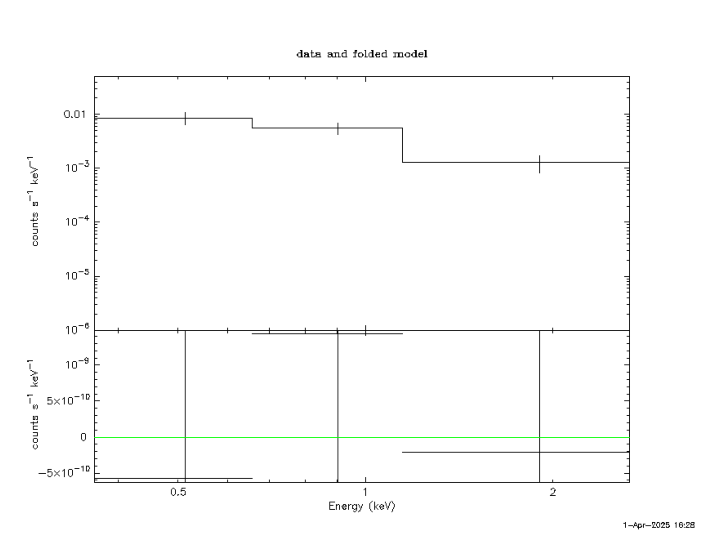

In [17]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.3748310°
- Dec = -27.2428069°

53.37 -27.24

**Column density :** nH = 2*10^20 cm^-2

In [18]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw (Best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 4301110.9257605625

bremss (Second best fit)
(tbabs) : 1.9626264347164708e+20

apec
(tbabs) : 6.04779637546473e+21

powerlaw (Best fit)
(tbabs) : 1.270114490312931e+21


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Powerlaw`` with Chi-squared = 1e-12 using 3 bins: **3.1794e-14 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Bremss`` with Chi-squared = 2e-09 using 3 bins: **3.044e-14 ergs/cm^2/s**.

In [2]:
Flux = 3.1794e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Powerlaw : F_x-ray = {Flux} ergs/cm^2/s")

X-ray flux : 
Powerlaw : F_x-ray = 3.1794e-14 ergs/cm^2/s


### Optical flux

In [3]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 17.5984

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 9.590236099191845e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [4]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 0.03315246848060314


## Luminosity

In [7]:
"""GAIA"""

P_mas = 1.9836 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Powerlaw : L_x-ray = {Luminosity} erg/s")

(GAIA)
Distance : d = 1.5556059689453518e+21 cm
Luminosity :
Powerlaw : L_x-ray = 9.66839167410058e+29 erg/s
